In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv("/content/winequality-red.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
print("The shape of dataset is", df.shape)

The shape of dataset is (1599, 12)


In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**data is cleaned and numeric too.**

In [9]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

**Data Plots to see their trends and relationships**
**We have all independent variables are numeric, no categorical, so we will plot these using barplots against target variable**

Text(0, 0.5, 'Count')

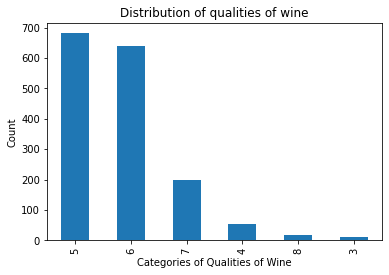

In [10]:
# Target variable (quality) bar plot
wine_quality_plot=df['quality'].value_counts().plot.bar()
plt.title("Distribution of qualities of wine")
plt.xlabel("Categories of Qualities of Wine")
plt.ylabel("Count")
# It shows that wine quality 5 and 6 are very highly distributed and 3 at lowest

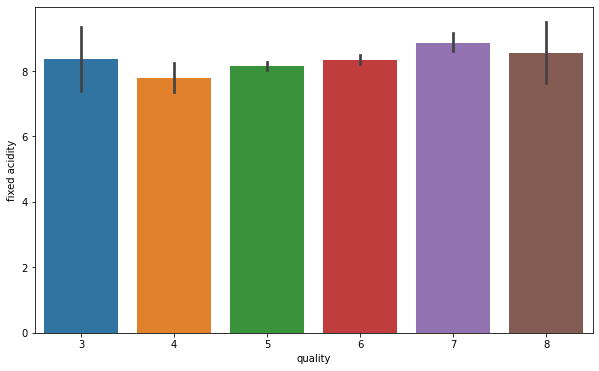

In [11]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

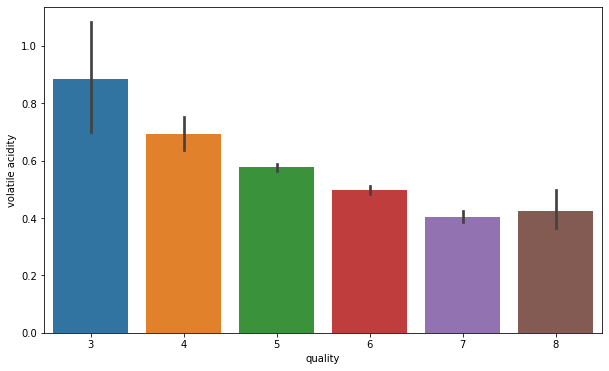

In [12]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

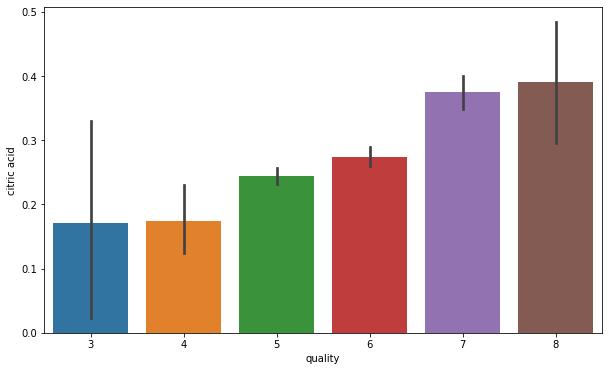

In [13]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

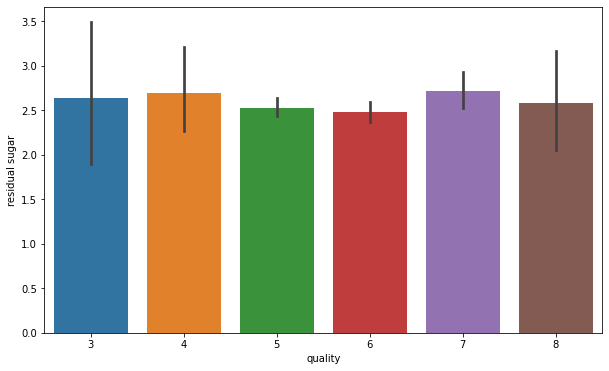

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)
# Nothing signicant can be inferred from this

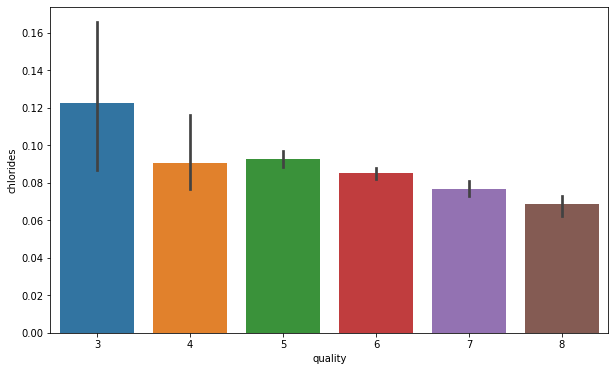

In [15]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

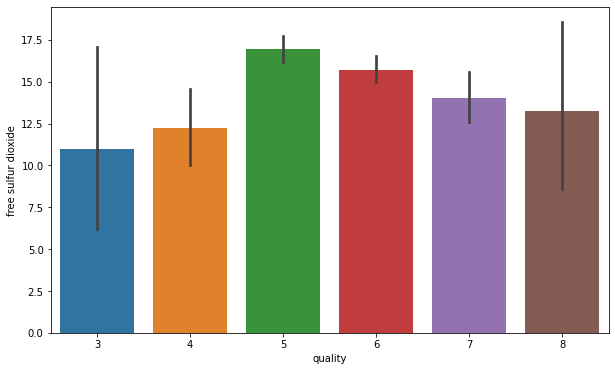

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)
# No significant trend can be derived from this

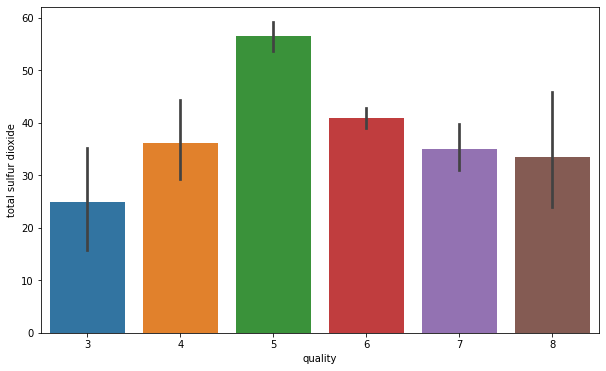

In [17]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)
# No significant trend can be derived from this

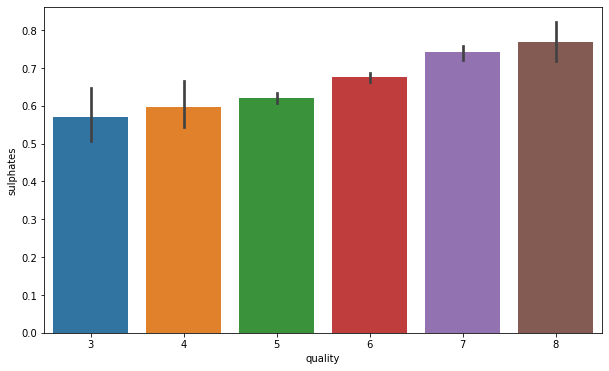

In [18]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

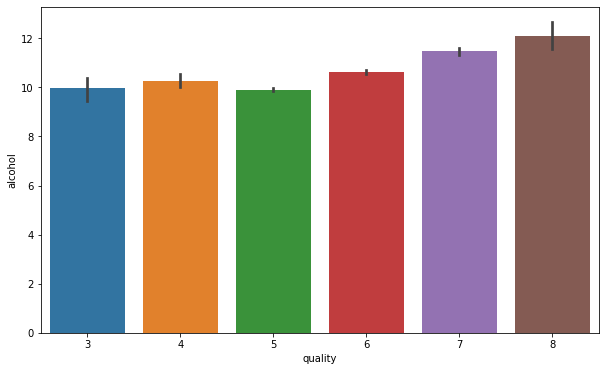

In [19]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

**Data Preprocessing for machine learning**

In [20]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [21]:
from sklearn.preprocessing import LabelEncoder
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [22]:
#Bad becomes 0 and good becomes 1 
df['quality'] = label_quality.fit_transform(df['quality'])

In [23]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

Text(0, 0.5, 'Count')

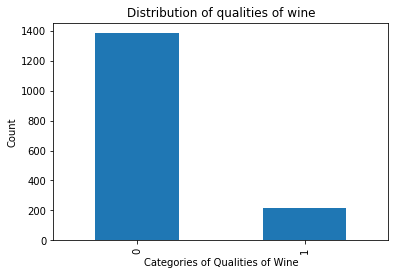

In [24]:
# Target variable (quality) bar plot
wine_quality_plot=df['quality'].value_counts().plot.bar()
plt.title("Distribution of qualities of wine")
plt.xlabel("Categories of Qualities of Wine")
plt.ylabel("Count")

**It shows that bad quality wine is highly distributed as compared to good quality wine**

**Now target variable has 2 categories and therefore it is the case fo binary classification problem. I will try multiple machine learning models but before that I will do standardization of data**

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
X1=df.drop('quality', 1)
y=df['quality']

In [27]:
X=scaler.fit_transform(X1)
X

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [28]:
print("The shape of independent variables", X.shape)
print("The shape of traget variable", y.shape)

The shape of independent variables (1599, 11)
The shape of traget variable (1599,)


**We have 1599 rows and 11 independent columns or variables**

In [29]:
# With sklearn train_test_split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

print((X_train.shape), "X_train +", (X_test.shape), "X_test")
print((y_train.shape), "y_train +", (y_test.shape), "y_test")

(1199, 11) X_train + (400, 11) X_test
(1199,) y_train + (400,) y_test


**Machine learning models used**

**1. Logistic Regression Classifier**

**2. Random Forest Classifier**

**3. SGD Classifier**

**4. SVC classifier **

**5. Voting Classifier**

**6. Bagging Classifier**

**7. Extra Tree Classifier**

**8. Adaboost Classifier**

**9. XGBoost Classifier**

**9. SVC & XGBoost Classifier with grid search(Hyperparametr Tuning, which would tell us best parameters to be taken inside classifier for best results)**

**10. Random forest and SGD for cross validation to improve accuracy**

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
clf1=LogisticRegression(random_state=42)

In [32]:
clf1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred1=clf1.predict(X_test)

In [34]:
from sklearn.metrics import classification_report
#Let's see how our model performed
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       347
           1       0.57      0.30      0.40        53

    accuracy                           0.88       400
   macro avg       0.74      0.63      0.66       400
weighted avg       0.86      0.88      0.86       400



In [35]:
from sklearn.ensemble import RandomForestClassifier 
clf2 = RandomForestClassifier(random_state=42)

In [36]:
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [37]:
y_pred2=clf2.predict(X_test)

In [38]:
from sklearn.metrics import classification_report
#Let's see how our model performed
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       347
           1       0.75      0.51      0.61        53

    accuracy                           0.91       400
   macro avg       0.84      0.74      0.78       400
weighted avg       0.90      0.91      0.91       400



In [39]:
from sklearn.linear_model import SGDClassifier   

clf3 = SGDClassifier(random_state=42, max_iter=10) # if you want reproducible results set the random_state value.
clf3.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=10,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [40]:
y_pred3=clf3.predict(X_test)

In [41]:
from sklearn.metrics import classification_report
#Let's see how our model performed
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       347
           1       0.40      0.62      0.49        53

    accuracy                           0.83       400
   macro avg       0.67      0.74      0.69       400
weighted avg       0.87      0.83      0.84       400



In [42]:
from sklearn.svm import SVC
clf4 = SVC()

In [43]:
clf4.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
y_pred4 = clf4.predict(X_test)

In [45]:
#Let's see how our model performed
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       347
           1       0.71      0.28      0.41        53

    accuracy                           0.89       400
   macro avg       0.81      0.63      0.67       400
weighted avg       0.88      0.89      0.87       400



In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier                 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf4 = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf4.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [76]:

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf4):
    clf.fit(X_train, y_train)
    y_pred5 = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred5))

LogisticRegression 0.8775
RandomForestClassifier 0.9125
SVC 0.89
VotingClassifier 0.885


In [48]:
from sklearn.ensemble import BaggingClassifier     
from sklearn.ensemble import RandomForestClassifier

bag_clf5 = BaggingClassifier( 
    RandomForestClassifier(), 
    n_estimators=500, 
    max_samples=300, 
    bootstrap=False, 
    n_jobs=-1
)

In [49]:
bag_clf5.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
     

In [77]:
y_pred6 = bag_clf5.predict(X_test)

In [78]:
#Let's see how our model performed
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       347
           1       0.67      0.26      0.38        53

    accuracy                           0.89       400
   macro avg       0.78      0.62      0.66       400
weighted avg       0.87      0.89      0.86       400



In [79]:
from sklearn.ensemble import ExtraTreesClassifier   

clf7 = ExtraTreesClassifier(n_estimators=195, max_leaf_nodes=16, n_jobs=-1, random_state=42)

In [80]:
clf7.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=16, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=195, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [82]:
y_pred7 = clf7.predict(X_test)

In [83]:
#Let's see how our model performed
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       347
           1       1.00      0.02      0.04        53

    accuracy                           0.87       400
   macro avg       0.93      0.51      0.48       400
weighted avg       0.89      0.87      0.81       400



In [84]:
from sklearn.ensemble import AdaBoostClassifier   

clf8 = AdaBoostClassifier(
    RandomForestClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
clf8.fit(X_train, y_train)
y_pred8 = clf8.predict(X_test)

In [85]:
#Let's see how our model performed
print(classification_report(y_test, y_pred8))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       347
           1       0.53      0.38      0.44        53

    accuracy                           0.87       400
   macro avg       0.72      0.66      0.68       400
weighted avg       0.86      0.87      0.86       400



In [86]:
from xgboost import XGBClassifier  
clf9 = XGBClassifier()
clf9.fit(X_train, y_train)
y_pred9 = clf9.predict(X_test)

In [87]:
#Let's see how our model performed
print(classification_report(y_test, y_pred9))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       347
           1       0.55      0.32      0.40        53

    accuracy                           0.88       400
   macro avg       0.73      0.64      0.67       400
weighted avg       0.86      0.88      0.86       400



In [88]:
# As we have seen that maximum accuracy came out of Random forest classifier but we can also increase accuracy above this using some more methods. Lets do that

In [89]:
# Method1: Grid search CV on SVC & SGD classifiers
# Method 2: Cross validation score for random forest and SGD

In [90]:
from sklearn.model_selection import GridSearchCV, cross_val_score
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(clf4, param_grid=param, scoring='accuracy', cv=10)

In [91]:
grid_svc.fit(X_train, y_train)
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.3, 'gamma': 0.8, 'kernel': 'rbf'}

In [92]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.3, gamma =  0.8, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       347
           1       0.74      0.43      0.55        53

    accuracy                           0.91       400
   macro avg       0.83      0.71      0.75       400
weighted avg       0.90      0.91      0.89       400



In [66]:
# As we can see accuracy level boost up from 89% to 91%

In [93]:
from xgboost import XGBClassifier  
from sklearn.model_selection import GridSearchCV  

param_grid = [
    {'learning_rate': [0.1, 0.3], 
     'min_child_weight': [0.5, 2], 'gamma': [0, 0.2], 'max_delta_step': [0], 'subsample': [1], 'colsample_bytree': [1], 'colsample_bylevel':[1], 'scale_pos_weight': [1]},]

xgbc_grid = XGBClassifier()
grid_search9 = GridSearchCV(xgbc_grid, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search9.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_po...e,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid=[{'colsample_bylevel': [1], 'colsample_bytree': [1],
                          'gamma': [0, 0.2], 'learning_rate': [0.1, 0.3],
                          'max_delta_step': [0], 'min_ch

In [94]:
y_pred10 = grid_search9.predict(X_test)

In [95]:
print(classification_report(y_test, y_pred10))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       347
           1       0.59      0.43      0.50        53

    accuracy                           0.89       400
   macro avg       0.75      0.69      0.72       400
weighted avg       0.87      0.89      0.88       400



In [71]:
#  XGB classifier accuracy also increased from 88% to 89%

In [72]:
# Lets apply cross validation score now

In [97]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()
# It is giving no improvement

0.9074579831932773

In [98]:
#Now lets try to do some evaluation for random forest model using cross validation.
sgd_eval = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
sgd_eval.mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

0.8465546218487395

**Performance measures and check which model is giving highest score.We will use following performance measures:**

**1. Confusion matrix**

**2. Precision, Recall, Accuracy score**

**3. Roc curves**

In [100]:
from sklearn import metrics
from sklearn.metrics import f1_score

In [101]:
cnf_matrix1=metrics.confusion_matrix(y_test, y_pred1)
cnf_matrix1

array([[335,  12],
       [ 37,  16]])

In [102]:
cnf_matrix2=metrics.confusion_matrix(y_test, y_pred2)
cnf_matrix2

array([[338,   9],
       [ 26,  27]])

In [103]:
cnf_matrix3=metrics.confusion_matrix(y_test, y_pred3)
cnf_matrix3

array([[298,  49],
       [ 20,  33]])

In [104]:
cnf_matrix4=metrics.confusion_matrix(y_test, y_pred4)
cnf_matrix4

array([[339,   8],
       [ 38,  15]])

In [105]:
cnf_matrix5=metrics.confusion_matrix(y_test, y_pred5)
cnf_matrix5

array([[339,   8],
       [ 38,  15]])

In [106]:
cnf_matrix6=metrics.confusion_matrix(y_test, y_pred6)
cnf_matrix6

array([[340,   7],
       [ 39,  14]])

In [107]:
cnf_matrix7=metrics.confusion_matrix(y_test, y_pred7)
cnf_matrix7

array([[347,   0],
       [ 52,   1]])

In [109]:
cnf_matrix8=metrics.confusion_matrix(y_test, y_pred8)
cnf_matrix8

array([[329,  18],
       [ 33,  20]])

In [110]:
cnf_matrix9=metrics.confusion_matrix(y_test, y_pred9)
cnf_matrix9

array([[333,  14],
       [ 36,  17]])

In [ ]:

1. Logistic Regression Classifier

2. Random Forest Classifier

3. SGD Classifier

*4. SVC classifier *

5. Voting Classifier

6. Bagging Classifier

7. Extra Tree Classifier

8. Adaboost Classifier

9. XGBoost Classifier

9. SVC & XGBoost Classifier with grid search(Hyperparametr Tuning, which would tell us best parameters to be taken inside classifier for best results)

10. Random forest and SGD for cross validation to improve accuracy



In [113]:
print("Logistic regression: ", classification_report(y_test, y_pred1))
print("-"*70)
print("Random Forest Classifier: ", classification_report(y_test, y_pred2))
print("-"*70)
print("SGD Classifier: ", classification_report(y_test, y_pred3))
print("-"*70)
print("SVC Classifier: ", classification_report(y_test, y_pred4))
print("-"*70)
print("Voting Classifier: ", classification_report(y_test, y_pred5))
print("-"*70)
print("Bagging Classifier: ", classification_report(y_test, y_pred6))
print("-"*70)
print("Extra Tree Classifier: ", classification_report(y_test, y_pred7))
print("-"*70)
print("Adaboost Classifier: ", classification_report(y_test, y_pred8))
print("-"*70)
print("XGBoost Classifier: ", classification_report(y_test, y_pred9))
print("-"*70)
print("SVC with hyperparametr tuning Classifier: ", classification_report(y_test, pred_svc2))
print("-"*70)

Logistic regression:                precision    recall  f1-score   support

           0       0.90      0.97      0.93       347
           1       0.57      0.30      0.40        53

    accuracy                           0.88       400
   macro avg       0.74      0.63      0.66       400
weighted avg       0.86      0.88      0.86       400

----------------------------------------------------------------------
Random Forest Classifier:                precision    recall  f1-score   support

           0       0.93      0.97      0.95       347
           1       0.75      0.51      0.61        53

    accuracy                           0.91       400
   macro avg       0.84      0.74      0.78       400
weighted avg       0.90      0.91      0.91       400

----------------------------------------------------------------------
SGD Classifier:                precision    recall  f1-score   support

           0       0.94      0.86      0.90       347
           1       0.40      

In [ ]:
# Above implementation of diffreent models shows that random forest classifier and svc (after hyperparameter tuning) are giving best accuracy levels that uis 91%